In [550]:
!pip install -q kaggle

In [551]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle.json': b'{"username":"taban123456","key":"0e301cbc4b47db5ed837878cdfc1c469"}'}

In [552]:
!mkdir -p ~/.kaggle

In [553]:
!cp kaggle.json ~/.kaggle/

In [554]:
!chmod 600 ~/.kaggle/kaggle.json

In [555]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

data_description.txt: Skipping, found more recently modified local copy (use --force to force download)
train.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [556]:
# !unzip house-prices-advanced-regression-techniques.zip

In [557]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -f submission.csv -m "Message"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python2.7/dist-packages/kaggle/cli.py", line 51, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 544, in competition_submit_cli
    competition, quiet)
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 495, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python2.7/genericpath.py", line 57, in getsize
    return os.stat(filename).st_size
OSError: [Errno 2] No such file or directory: 'submission.csv'


In [558]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow.keras import models,layers,optimizers

SalePrice - قیمت فروش ملک به دلار. این متغیر هدف است که می خواهید پیش بینی کنید.
MSSubClass: کلاس ساختمان
MSZoning: طبقه بندی منطقه بندی عمومی
LotFrontage: پای خطی خیابان متصل به ملک
LotArea: اندازه قطعه در فوت مربع
خیابان: نوع دسترسی به جاده
کوچه: نوع دسترسی کوچه
LotShape: شکل کلی ویژگی
LandContour: مسطح بودن ملک
آب و برق: نوع ابزارهای موجود
LotConfig: پیکربندی لات
LandSlope: شیب ملک
محله: مکان های فیزیکی در محدوده شهر ایمز
شرایط 1: نزدیکی به جاده اصلی یا راه آهن
شرایط 2: نزدیکی به جاده اصلی یا راه آهن (در صورت وجود راه دوم)
BldgType: نوع مسکن
HouseStyle: سبک زندگی
OverallQual: مواد کلی و کیفیت نهایی
OverallCond: رتبه کلی وضعیت
YearBuilt: تاریخ ساخت اصلی
YearRemodAdd: تاریخ بازسازی
RoofStyle: نوع سقف
RoofMatl: مواد سقف
External1st: پوشش بیرونی روی خانه
Exterior2nd: پوشش بیرونی روی خانه (اگر بیش از یک ماده باشد)
MasVnrType: نوع روکش بنایی
MasVnrArea: ناحیه روکش بنایی در فوت مربع
ExterQual: کیفیت مواد خارجی
ExterCond: وضعیت فعلی مواد در نمای بیرونی
فونداسیون: نوع فونداسیون
BsmtQual: ارتفاع زیرزمین
BsmtCond: وضعیت عمومی زیرزمین
BsmtExposure: دیوارهای زیرزمین پیاده روی یا سطح باغ
BsmtFinType1: کیفیت سطح زیرزمین تمام شده
BsmtFinSF1: نوع 1 متر مربع تمام شده
BsmtFinType2: کیفیت ناحیه تمام شده دوم (در صورت وجود)
BsmtFinSF2: نوع 2 فوت مربع تمام شده
BsmtUnfSF: فوت مربع ناتمام از زیرزمین
TotalBsmtSF: کل فوت مربع مساحت زیرزمین
گرمایش: نوع گرمایش
Heating QC: کیفیت و وضعیت گرمایش
CentralAir: تهویه مطبوع مرکزی
برق: سیستم برق
1stFlrSF: طبقه اول فوت مربع
2ndFlrSF: طبقه دوم فوت مربع
LowQualFinSF: پای مربع با کیفیت پایین (تمام طبقات)
GrLivArea: مساحت بالای سطح (زمین) مساحت مربع
BsmtFullBath: حمام کامل زیرزمین
BsmtHalfBath: نیم حمام زیرزمین
FullBath: حمام کامل بالاتر از درجه
HalfBath: نصف حمام بالاتر از درجه
اتاق خواب: تعداد اتاق خوابهای بالاتر از سطح زیرزمین
آشپزخانه: تعداد آشپزخانه
KitchenQual: کیفیت آشپزخانه
TotRmsAbvGrd: مجموع اتاقهای بالاتر از درجه (حمام را شامل نمی شود)
عملکردی: رتبه عملکرد خانه
شومینه: تعداد شومینه
FireplaceQu: کیفیت شومینه
GarageType: محل گاراژ
GarageYrBlt: گاراژ سالی ساخته شد
GarageFinish: اتمام داخلی گاراژ
GarageCars: اندازه گاراژ در ظرفیت ماشین
GarageArea: اندازه گاراژ در فوت مربع
GarageQual: کیفیت گاراژ
GarageCond: شرایط گاراژ
PavedDrive: مسیر پیاده رو شده
WoodDeckSF: مساحت عرشه چوبی در فوت مربع
OpenPorchSF: ناحیه ایوان را به فوت مربع باز کنید
EnclosedPorch: محوطه ایوان محصور در فوت مربع
3SsnPorch: منطقه ایوان سه فصل در فوت مربع
ScreenPorch: منطقه ایوان صفحه نمایش در فوت مربع
PoolArea: منطقه استخر در فوت مربع
PoolQC: کیفیت استخر
حصار: کیفیت حصار
ویژگی متفرقه: ویژگی های متفاوتی که در دسته های دیگر پوشش داده نمی شوند
MiscVal: $ ارزش ویژگی های مختلف
MoSold: ماه فروخته شد
YrSold: سال فروخته شد
SaleType: نوع فروش
وضعیت: شرایط فروش

In [559]:
train_data  = pd.read_csv('/content/train.csv')

In [560]:
test_data = pd.read_csv('/content/test.csv')

In [561]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [562]:
corr_matrix = train_data.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False).drop(['SalePrice'])
corr_matrix.style.background_gradient(cmap = 'coolwarm').set_precision(2)

,SalePrice
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52
YearRemodAdd,0.51


In [563]:
missing = pd.concat([train_data.isna().sum().sort_values(ascending = False), train_data.dtypes], axis=1, keys=['Total', 'Type'])
missing[missing['Total'] > 0]

,Total,Type
PoolQC,1453,object
MiscFeature,1406,object
Alley,1369,object
Fence,1179,object
FireplaceQu,690,object
LotFrontage,259,float64
GarageCond,81,object
GarageType,81,object
GarageYrBlt,81,float64
GarageFinish,81,object


شناسایی و حذف نقاط 
outliers




In [564]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


LotFrontage: خیابان متصل به ملک

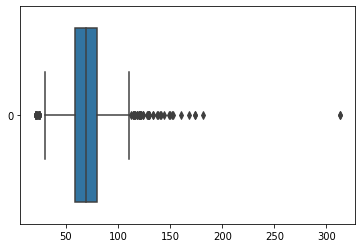

In [565]:
import seaborn as sns
sns.boxplot(data = train_data['LotFrontage'], orient = 'h')

In [566]:
train_data['LotFrontage'].sort_values(ascending = False)

1298    313.0
934     313.0
1127    182.0
197     174.0
231     174.0
        ...  
1429      NaN
1431      NaN
1441      NaN
1443      NaN
1446      NaN
Name: LotFrontage, Length: 1460, dtype: float64

LotArea: اندازه قطعه در فوت مربع
خیابان: نوع دسترسی به جاده
کوچه: نوع دسترسی کوچه

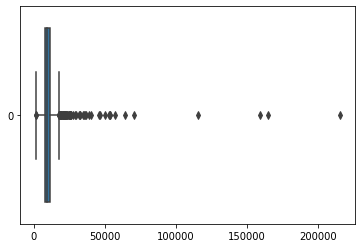

In [567]:
sns.boxplot(data = train_data['LotArea'], orient = 'h')

In [568]:
train_data['LotArea'].sort_values(ascending = False)

313     215245
335     164660
249     159000
706     115149
451      70761
         ...  
1449      1533
489       1526
614       1491
1039      1477
956       1300
Name: LotArea, Length: 1460, dtype: int64

MasVnrArea: ناحیه روکش بنایی در فوت مربع

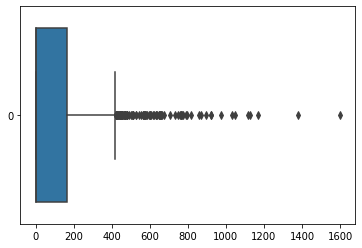

In [569]:
sns.boxplot(data = train_data['MasVnrArea'], orient = 'h')

In [570]:
train_data['MasVnrArea'].sort_values(ascending = False)

297     1600.0
1169    1378.0
691     1170.0
115     1129.0
70      1115.0
         ...  
936        NaN
973        NaN
977        NaN
1243       NaN
1278       NaN
Name: MasVnrArea, Length: 1460, dtype: float64

In [571]:
train_data['BsmtFinSF1'].sort_values(ascending = False)

1298    5644
523     2260
898     2188
1182    2096
178     1904
        ... 
710        0
709        0
1337       0
708        0
1090       0
Name: BsmtFinSF1, Length: 1460, dtype: int64

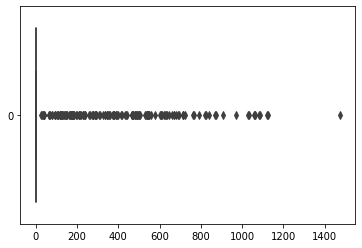

In [572]:
sns.boxplot(data = train_data['BsmtFinSF2'], orient = 'h')

In [573]:
train_data['BsmtFinSF2'].sort_values(ascending = False)

322    1474
542    1127
470    1120
854    1085
153    1080
       ... 
952       0
954       0
955       0
956       0
0         0
Name: BsmtFinSF2, Length: 1460, dtype: int64

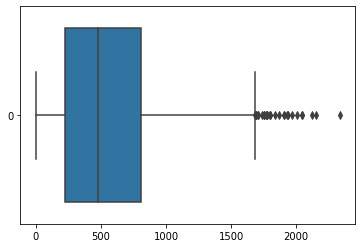

In [574]:
sns.boxplot(data = train_data['BsmtUnfSF'], orient = 'h')

In [575]:
train_data['BsmtUnfSF'].sort_values(ascending = False)

224    2336
477    2153
278    2121
678    2046
581    2042
       ... 
828       0
845       0
856       0
260       0
259       0
Name: BsmtUnfSF, Length: 1460, dtype: int64

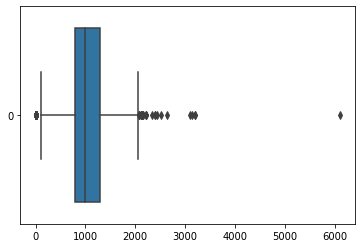

In [576]:
sns.boxplot(data = train_data['TotalBsmtSF'], orient = 'h')

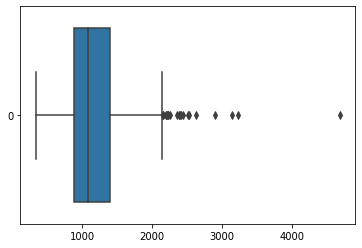

In [577]:
sns.boxplot(data = train_data['1stFlrSF'], orient = 'h')

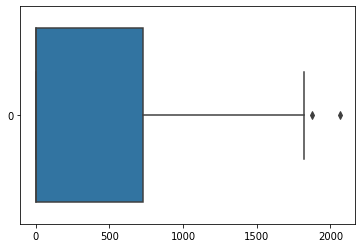

In [578]:
sns.boxplot(data = train_data['2ndFlrSF'], orient = 'h')

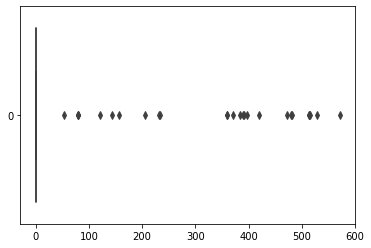

In [579]:
sns.boxplot(data = train_data['LowQualFinSF'], orient = 'h')

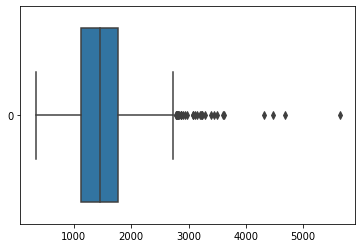

In [580]:
sns.boxplot(data = train_data['GrLivArea'], orient = 'h')

In [581]:
train_data['GrLivArea'].sort_values()

533      334
1100     438
916      480
29       520
528      605
        ... 
1169    3627
691     4316
1182    4476
523     4676
1298    5642
Name: GrLivArea, Length: 1460, dtype: int64

حمام کامل زیرزمین

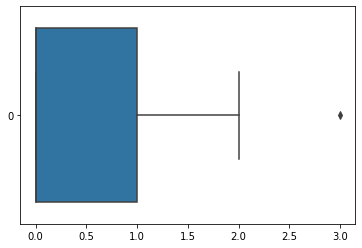

In [582]:
sns.boxplot(data = train_data['BsmtFullBath'], orient = 'h')

In [583]:
train_data['BsmtFullBath'].sort_values()

729     0
647     0
648     0
650     0
652     0
       ..
588     2
921     2
634     2
1163    2
738     3
Name: BsmtFullBath, Length: 1460, dtype: int64

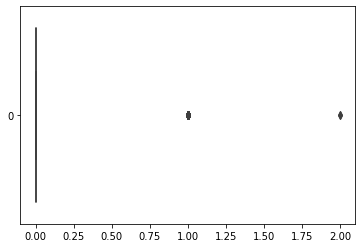

In [584]:
sns.boxplot(data = train_data['BsmtHalfBath'], orient = 'h')

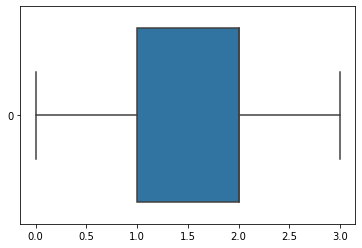

In [585]:
sns.boxplot(data = train_data['FullBath'], orient = 'h')

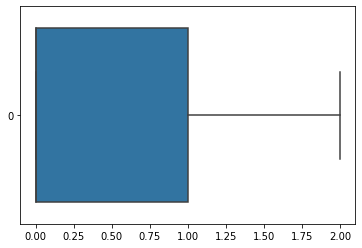

In [586]:
sns.boxplot(data = train_data['HalfBath'], orient = 'h')

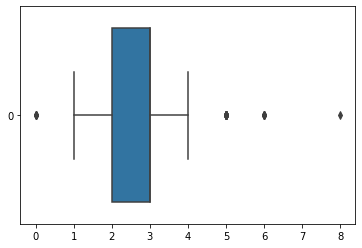

In [587]:
sns.boxplot(data = train_data['BedroomAbvGr'], orient = 'h')

In [588]:
train_data['BedroomAbvGr'].sort_values()

1163    0
1213    0
634     0
1270    0
53      0
       ..
144     6
291     6
897     6
330     6
635     8
Name: BedroomAbvGr, Length: 1460, dtype: int64

نوع مسکن مربوط به فروش را مشخص می کند

In [589]:
train_data['MSSubClass'].value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [590]:
corr_matrix.loc[['MSSubClass']]

,SalePrice
MSSubClass,-0.084284


همبستگی با قیمت منفی است.   این ستون بی فایده به نظر می رسد - ما سالی دیگر قیمتی دیگر را داریم بنابراین  من آن را حذف می کنم.

In [591]:
train_data = train_data.drop('MSSubClass', 1)

MSZoning
طبقه بندی فروش منطقه ای  را مشخص می کند



In [592]:
train_data['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

 این ستون در مورد چگالی است.  هرچه کمتر  بهتر.

گروهبند ونرمالسازی وتبدیل نوع داده به 
float


In [593]:
msz = train_data.groupby('MSZoning', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)

msz['normalized'] = round((msz['SalePrice'] - msz['SalePrice'].min()) / (msz['SalePrice'].max() - msz['SalePrice'].min()),3)

train_data['MSZoning'] = train_data['MSZoning'].apply(lambda x: msz.loc[msz['MSZoning'] == x, 'normalized'].item())
train_data['MSZoning'] = train_data['MSZoning'].astype(float)

In [594]:
train_data.corr()[['SalePrice']].sort_values(by = ['SalePrice'], 
ascending = False).drop(['SalePrice']).loc[['MSZoning']]


,SalePrice
MSZoning,0.327963



LotFrontage: خیابان متصل به ملک

در اینجا مقادیر گم شده را دریافت کرده اید من برای پر کردن آنها از 
mean 
استفاده خواهم کرد.

In [595]:
train_data['LotFrontage'].skew()

2.163569142324884

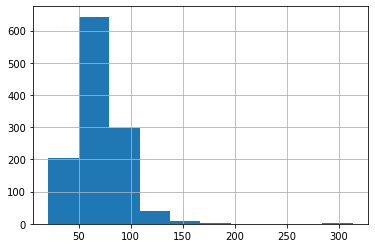

In [596]:
train_data['LotFrontage'].hist()

In [597]:
train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean(), inplace = True)

LotArea: اندازه قطعه در فوت مربع

In [598]:
train_data['LotArea'].value_counts()

7200     25
9600     24
6000     17
10800    14
9000     14
         ..
7094      1
6130      1
9337      1
5232      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

خیابان: نوع دسترسی جاده به ملک

In [599]:
train_data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

این یکی بسیار اریب است .  به طور کلی می تواند روی قیمت تأثیرمنفی بگذارد.

In [600]:
train = train_data.drop('Street', 1)

کوچه: نوع دسترسی کوچه به ملک

 وجود کوچه به صورت 1 ،  
نبود آن به عنوان 0 کدگذاری می شود.

In [601]:
train_data['Alley'].fillna(0, inplace = True)
train_data['Alley'] = train_data['Alley'].replace('Grvl', '1', regex = True)
train_data['Alley'] = train_data['Alley'].replace('Pave', '1', regex = True)
train_data['Alley'] = train_data['Alley'].astype(int)

LotShape: شکل کلی ویژگی

In [602]:
lshp = train_data.groupby('LotShape', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
lshp['normalized'] = round((lshp['SalePrice'] - lshp['SalePrice'].min()) / (lshp['SalePrice'].max() - lshp['SalePrice'].min()),3)
train_data['LotShape'] = train_data['LotShape'].apply(lambda x: lshp.loc[lshp['LotShape'] == x, 'normalized'].item())
train_data['LotShape'] = train_data['LotShape'].astype(float)

LandContour: مسطح بودن ملک

In [603]:
lctr = train_data.groupby('LandContour', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
lctr['normalized'] = round((lctr['SalePrice'] - lctr['SalePrice'].min()) / (lctr['SalePrice'].max() - lctr['SalePrice'].min()),3)
train_data['LandContour'] = train_data['LandContour'].apply(lambda x: lctr.loc[lctr['LandContour'] == x, 'normalized'].item())
train_data['LandContour'] = train_data['LandContour'].astype(float)

آب و برق: نوع ابزارهای موجود

In [604]:
train_data['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

.فکر کنم هیچ تاثیری بر قیمت نداشته باشد.

In [605]:
train_data = train_data.drop('Utilities', 1)

LotConfig: پیکربندی

In [606]:
lcfg = train_data.groupby('LotConfig', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
lcfg['normalized'] = round((lcfg['SalePrice'] - lcfg['SalePrice'].min()) / (lcfg['SalePrice'].max() - lcfg['SalePrice'].min()),3)
train_data['LotConfig'] = train_data['LotConfig'].apply(lambda x: lcfg.loc[lcfg['LotConfig'] == x, 'normalized'].item())
train_data['LotConfig'] = train_data['LotConfig'].astype(float)

LandSlope: شیب ملک

In [607]:
lslp = train_data.groupby('LandSlope', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
lslp['normalized'] = round((lslp['SalePrice'] - lslp['SalePrice'].min()) / (lslp['SalePrice'].max() - lslp['SalePrice'].min()),3)
train_data['LandSlope'] = train_data['LandSlope'].apply(lambda x: lslp.loc[lslp['LandSlope'] == x, 'normalized'].item())
train_data['LandSlope'] = train_data['LandSlope'].astype(float)

محله: مکان های فیزیکی در محدوده شهر ایمز

In [608]:
ngbh = train_data.groupby('Neighborhood', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
ngbh['normalized'] = round((ngbh['SalePrice'] - ngbh['SalePrice'].min()) / (ngbh['SalePrice'].max() - ngbh['SalePrice'].min()),3)
train_data['Neighborhood'] = train_data['Neighborhood'].apply(lambda x: ngbh.loc[ngbh['Neighborhood'] == x, 'normalized'].item())
train_data['Neighborhood'] = train_data['Neighborhood'].astype(float)

In [609]:
cond1 = train_data.groupby('Condition1', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
cond1['normalized'] = round((cond1['SalePrice'] - cond1['SalePrice'].min()) / (cond1['SalePrice'].max() - cond1['SalePrice'].min()),3)
train_data['Condition1'] = train_data['Condition1'].apply(lambda x: cond1.loc[cond1['Condition1'] == x, 'normalized'].item())
train_data['Condition1'] = train_data['Condition1'].astype(float)
train_data = train_data.drop('Condition2', 1)

BldgType: نوع مسکن

In [610]:
bldg = train_data.groupby('BldgType', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
bldg['normalized'] = round((bldg['SalePrice'] - bldg['SalePrice'].min()) / (bldg['SalePrice'].max() - bldg['SalePrice'].min()),3)
train_data['BldgType'] = train_data['BldgType'].apply(lambda x: bldg.loc[bldg['BldgType'] == x, 'normalized'].item())
train_data['BldgType'] = train_data['BldgType'].astype(float)

HouseStyle: سبک زندگی

In [611]:
hstl = train_data.groupby('HouseStyle', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
hstl['normalized'] = round((hstl['SalePrice'] - hstl['SalePrice'].min()) / (hstl['SalePrice'].max() - hstl['SalePrice'].min()),3)
train_data['HouseStyle'] = train_data['HouseStyle'].apply(lambda x: hstl.loc[hstl['HouseStyle'] == x, 'normalized'].item())
train_data['HouseStyle'] = train_data['HouseStyle'].astype(float)

OverallQual: مصالح کلی و پایان خانه را ارزیابی می کند

بیایید فقط بررسی کنیم که آیا تأثیر کیفیت بر قیمت مناسب است یا خیر

In [612]:
train_data.groupby('OverallQual', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)

,OverallQual,SalePrice
9,10,438588.388889
8,9,367513.023256
7,8,274735.535714
6,7,207716.423197
5,6,161603.034759
4,5,133523.347607
3,4,108420.655172
2,3,87473.750000
1,2,51770.333333
0,1,50150.000000


خوب. کیفیت بیشتر - قیمت بالاتر است.

OverallCond: وضعیت کلی خانه را ارزیابی می کند

In [613]:
train_data.groupby('OverallCond', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)

,OverallCond,SalePrice
8,9,216004.545455
4,5,203146.914738
6,7,158145.487805
7,8,155651.736111
5,6,153961.591270
1,2,141986.400000
3,4,120438.438596
2,3,101929.400000
0,1,61000.000000


این بار مقیاس با قیمت رابطه منفی دارد. من فکر می کنم خانه هایی در منطقه معتبرتر وجود دارد ، اما در شرایط بدتری هستند - اما هنوز هم هزینه بیشتری دارند

YearBuilt: تاریخ ساخت اصلی

In [614]:
with pd.option_context('display.max_columns', None): 
    display(train_data[train_data['YearBuilt'].isin([1872])])

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1349,1350,0.371,50.0,5250,Pave,1,0.0,0.419,0.0,0.0,0.125,0.544,1.0,0.909,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,BrkTil,TA,Fa,No,LwQ,259,Unf,0,425,684,OthW,Fa,N,SBrkr,938,1215,205,2358,0,0,2,0,4,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000


و تاثیر سال بر قیمت فروش

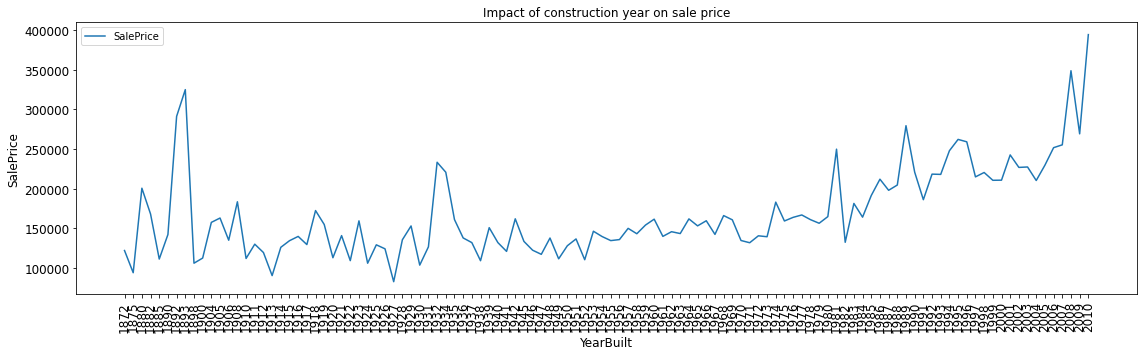

In [615]:
train_year_sp = train_data.groupby('YearBuilt', as_index = False)['SalePrice'].mean().sort_values(by = 'YearBuilt')
ax = train_year_sp[['SalePrice']].plot(kind = 'line',
                                       title = 'Impact of construction year on sale price',
                                       figsize = (19,5),
                                       legend = True,
                                       fontsize = 12)
ax.set_xlabel('YearBuilt', fontsize=12)
ax.set_ylabel('SalePrice', fontsize=12)
ax.set_xticks(range(len(train_year_sp)))
ax.set_xticklabels(train_year_sp['YearBuilt'])
plt.xticks(rotation = 90)
plt.show()

YearRemodAdd: تاریخ بازسازی (همان تاریخ ساخت در صورت عدم بازسازی یا افزودنی)

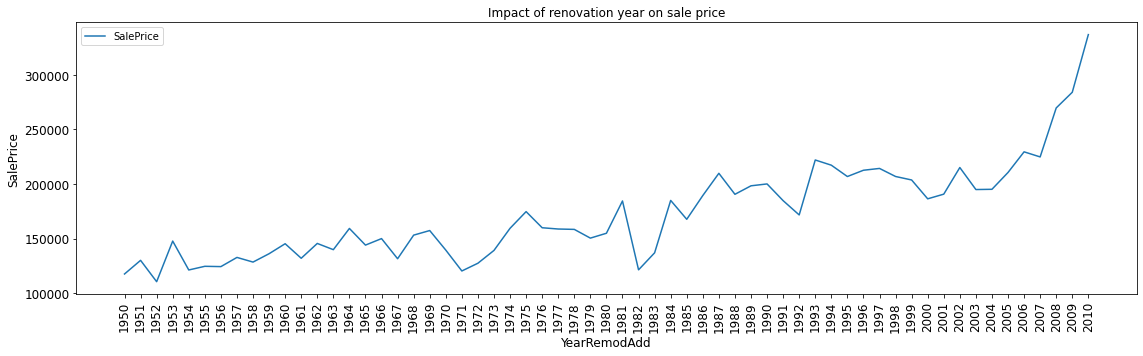

In [616]:
train_year_rem_sp = train_data.groupby('YearRemodAdd', as_index = False)['SalePrice'].mean().sort_values(by = 'YearRemodAdd')
ax = train_year_rem_sp[['SalePrice']].plot(kind = 'line',
                                                   title = 'Impact of renovation year on sale price',
                                                   figsize = (19,5),
                                                   legend = True,
                                                   fontsize = 12)
ax.set_xlabel('YearRemodAdd', fontsize=12)
ax.set_ylabel('SalePrice', fontsize=12)
ax.set_xticks(range(len(train_year_rem_sp)))
ax.set_xticklabels(train_year_rem_sp['YearRemodAdd'])
plt.xticks(rotation=90)
plt.show()

RoofStyle: نوع سقف

In [617]:
rfst = train_data.groupby('RoofStyle', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
rfst['normalized'] = round((rfst['SalePrice'] - rfst['SalePrice'].min()) / (rfst['SalePrice'].max() - rfst['SalePrice'].min()),3)
train_data['RoofStyle'] = train_data['RoofStyle'].apply(lambda x: rfst.loc[rfst['RoofStyle'] == x, 'normalized'].item())
train_data['RoofStyle'] = train_data['RoofStyle'].astype(float)

RoofMart: مواد سقف

In [618]:
rfmt = train_data.groupby('RoofMatl', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
rfmt['normalized'] = round((rfmt['SalePrice'] - rfmt['SalePrice'].min()) / (rfmt['SalePrice'].max() - rfmt['SalePrice'].min()),3)
train_data['RoofMatl'] = train_data['RoofMatl'].apply(lambda x: rfmt.loc[rfmt['RoofMatl'] == x, 'normalized'].item())
train_data['RoofMatl'] = train_data['RoofMatl'].astype(float)

External1st: پوشش بیرونی روی خانه

In [619]:
ext1 = train_data.groupby('Exterior1st', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
ext1['normalized'] = round((ext1['SalePrice'] - ext1['SalePrice'].min()) / (ext1['SalePrice'].max() - ext1['SalePrice'].min()),3)
train_data['Exterior1st'] = train_data['Exterior1st'].apply(lambda x: ext1.loc[ext1['Exterior1st'] == x, 'normalized'].item())
train_data['Exterior1st'] = train_data['Exterior1st'].astype(float)

Exterior2nd: پوشش بیرونی روی خانه (اگر بیش از یک ماده باشد

In [620]:
ext2 = train_data.groupby('Exterior2nd', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
ext2['normalized'] = round((ext2['SalePrice'] - ext2['SalePrice'].min()) / (ext2['SalePrice'].max() - ext2['SalePrice'].min()),3)
train_data['Exterior2nd'] = train_data['Exterior2nd'].apply(lambda x: ext2.loc[ext2['Exterior2nd'] == x, 'normalized'].item())
train_data['Exterior2nd'] = train_data['Exterior2nd'].astype(float)

MasVnrType: نوع روکش بنایی

In [621]:
train_data['MasVnrType'].fillna('None', inplace = True)
mvtp = train.groupby('MasVnrType', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
mvtp['normalized'] = round((mvtp['SalePrice'] - mvtp['SalePrice'].min()) / (mvtp['SalePrice'].max() - mvtp['SalePrice'].min()),3)
train_data['MasVnrType'] = train_data['MasVnrType'].apply(lambda x: mvtp.loc[mvtp['MasVnrType'] == x, 'normalized'].item())
train_data['MasVnrType'] = train_data['MasVnrType'].astype(float)

MasVnrArea: ناحیه روکش بنایی در فوت مربع

In [622]:
value = train_data[train_data['SalePrice'].between(train_data[train_data['MasVnrArea'].isna()]['SalePrice'].mean() - 1000, train[train['MasVnrArea'].isna()]['SalePrice'].mean() + 1000)]['MasVnrArea'].mean()
train_data['MasVnrArea'].fillna(value, inplace = True)

ExterQual: کیفیت مواد خارجی را ارزیابی می کند

In [623]:
exql = train_data.groupby('ExterQual', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
exql['normalized'] = round((exql['SalePrice'] - exql['SalePrice'].min()) / (exql['SalePrice'].max() - exql['SalePrice'].min()),3)
train_data['ExterQual'] = train_data['ExterQual'].apply(lambda x: exql.loc[exql['ExterQual'] == x, 'normalized'].item())
train_data['ExterQual'] = train_data['ExterQual'].astype(float)

فونداسیون: نوع فونداسیون

In [624]:
fndt = train_data.groupby('Foundation', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
fndt['normalized'] = round((fndt['SalePrice'] - fndt['SalePrice'].min()) / (fndt['SalePrice'].max() - fndt['SalePrice'].min()),3)
train_data['Foundation'] = train_data['Foundation'].apply(lambda x: fndt.loc[fndt['Foundation'] == x, 'normalized'].item())
train_data['Foundation'] = train_data['Foundation'].astype(float)

گروه ستونهای زیرزمین


گرمایش: نوع گرمایش

In [625]:
heat = train_data.groupby('Heating', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
heat['normalized'] = round((heat['SalePrice'] - heat['SalePrice'].min()) / (heat['SalePrice'].max() - heat['SalePrice'].min()),3)
train_data['Heating'] = train_data['Heating'].apply(lambda x: heat.loc[heat['Heating'] == x, 'normalized'].item())
train_data['Heating'] = train_data['Heating'].astype(float)

Heating QC: کیفیت و وضعیت گرمایش

In [626]:
htqc = train_data.groupby('HeatingQC', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
htqc['normalized'] = round((htqc['SalePrice'] - htqc['SalePrice'].min()) / (htqc['SalePrice'].max() - htqc['SalePrice'].min()),3)
train_data['HeatingQC'] = train_data['HeatingQC'].apply(lambda x: htqc.loc[htqc['HeatingQC'] == x, 'normalized'].item())
train_data['HeatingQC'] = train_data['HeatingQC'].astype(float)

CentralAir: تهویه مطبوع مرکزی

وی دارای 2 مقدار است - Y و N. به ترتیب به 1 و 0 تغییر دهید.

In [627]:
train_data['CentralAir'] = train_data['CentralAir'].replace('Y', '1', regex = True)
train_data['CentralAir'] = train_data['CentralAir'].replace('N', '0', regex = True)
train_data['CentralAir'] = train_data['CentralAir'].astype(int)

برق: سیستم برق
یک مقدار از دست رفته در این ستون وجود دارد

In [628]:
train_data['Electrical'].fillna('None', inplace = True)
elec = train_data.groupby('Electrical', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
elec['normalized'] = round((elec['SalePrice'] - elec['SalePrice'].min()) / (elec['SalePrice'].max() - elec['SalePrice'].min()),3)
train_data['Electrical'] = train_data['Electrical'].apply(lambda x: elec.loc[elec['Electrical'] == x, 'normalized'].item())
train_data['Electrical'] = train_data['Electrical'].astype(float)

KitchenQual: کیفیت آشپزخانه

In [629]:
kchq = train_data.groupby('KitchenQual', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
kchq['normalized'] = round((kchq['SalePrice'] - kchq['SalePrice'].min()) / (kchq['SalePrice'].max() - kchq['SalePrice'].min()),3)
train_data['KitchenQual'] = train_data['KitchenQual'].apply(lambda x: kchq.loc[kchq['KitchenQual'] == x, 'normalized'].item())
train_data['KitchenQual'] = train_data['KitchenQual'].astype(float)

عملکردی: عملکرد خانه (فرض کنید معمولی است مگر اینکه کسرهای لازم باشد)

In [630]:
func = train_data.groupby('Functional', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
func['normalized'] = round((func['SalePrice'] - func['SalePrice'].min()) / (func['SalePrice'].max() - func['SalePrice'].min()),3)
train_data['Functional'] = train_data['Functional'].apply(lambda x: func.loc[func['Functional'] == x, 'normalized'].item())
train_data['Functional'] = train_data['Functional'].astype(float)

شومینه: تعداد شومینه

In [631]:
train_data['Fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

FireplaceQu: کیفیت شومینه
این مورد دارای 690 مقدار مفقود شده است. همان مقدار دارایی با 0 شومینه. آنها را به هیچکدام تغییر دهید.

In [632]:
train_data['FireplaceQu'].fillna('None', inplace = True)
frpq = train_data.groupby('FireplaceQu', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
frpq['normalized'] = round((frpq['SalePrice'] - frpq['SalePrice'].min()) / (frpq['SalePrice'].max() - frpq['SalePrice'].min()),3)
train_data['FireplaceQu'] = train_data['FireplaceQu'].apply(lambda x: frpq.loc[frpq['FireplaceQu'] == x, 'normalized'].item())
train_data['FireplaceQu'] = train_data['FireplaceQu'].astype(float)

در اینجا گروه گاراژ می آید

In [633]:
garage_cols = [col for col in train_data if col.startswith('Garage')]
train_data[train_data['GarageType'].isna()][garage_cols]['GarageArea'].sum()

0

خوب. بدون گاراژ - مشکلی نیست ، با هیچ کدام پر کنید ، تعدادی را به عددی تغییر دهید.

In [634]:
for col in garage_cols:
    train_data[col].fillna('None', inplace = True)
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].replace('None', 0, regex = True)
train_data['GarageCars'] = train_data['GarageCars'].replace('None', 0, regex = True)
train_data['GarageArea'] = train_data['GarageArea'].replace('None', 0, regex = True)

GarageType: محل گاراژ

In [635]:
grtp = train_data.groupby('GarageType', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
grtp['normalized'] = round((grtp['SalePrice'] - grtp['SalePrice'].min()) / (grtp['SalePrice'].max() - grtp['SalePrice'].min()),3)
train_data['GarageType'] = train_data['GarageType'].apply(lambda x: grtp.loc[grtp['GarageType'] == x, 'normalized'].item())
train_data['GarageType'] = train_data['GarageType'].astype(float)

GarageYrBlt: سالی که گاراژ ساخته شد
بیایید نقشه بکشیم

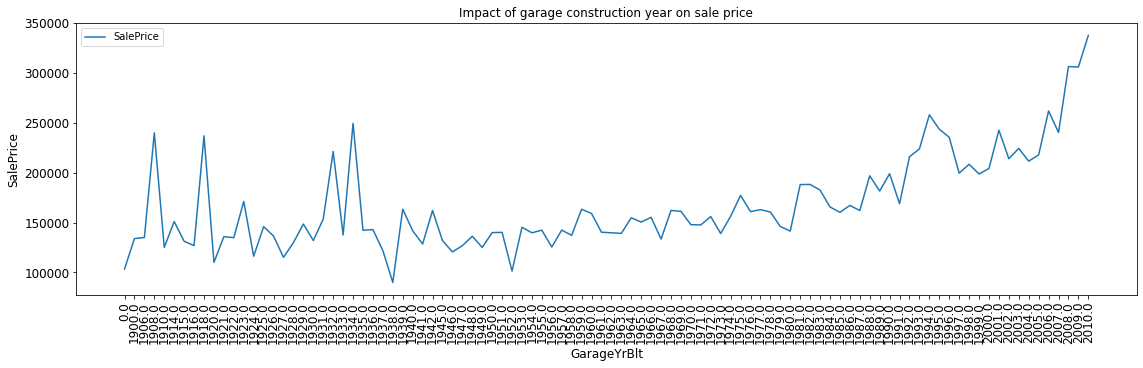

In [636]:
train_year_grg_blt = train_data.groupby('GarageYrBlt', as_index = False)['SalePrice'].mean().sort_values(by = 'GarageYrBlt')
ax = train_year_grg_blt[['SalePrice']].plot(kind = 'line',
                                                   title = 'Impact of garage construction year on sale price',
                                                   figsize = (19,5),
                                                   legend = True,
                                                   fontsize = 12)
ax.set_xlabel('GarageYrBlt', fontsize=12)
ax.set_ylabel('SalePrice', fontsize=12)
ax.set_xticks(range(len(train_year_grg_blt)))
ax.set_xticklabels(train_year_grg_blt['GarageYrBlt'])
plt.xticks(rotation=90)
plt.show()

همان قله هایی که در قطعه سال ساخت وجود دارد.

گاراژ

In [637]:
grfn = train_data.groupby('GarageFinish', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
grfn['normalized'] = round((grfn['SalePrice'] - grfn['SalePrice'].min()) / (grfn['SalePrice'].max() - grfn['SalePrice'].min()),3)
train_data['GarageFinish'] = train_data['GarageFinish'].apply(lambda x: grfn.loc[grfn['GarageFinish'] == x, 'normalized'].item())
train_data['GarageFinish'] = train_data['GarageFinish'].astype(float)

GarageQual: کیفیت گاراژ

In [638]:
grqu = train_data.groupby('GarageQual', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
grqu['normalized'] = round((grqu['SalePrice'] - grqu['SalePrice'].min()) / (grqu['SalePrice'].max() - grqu['SalePrice'].min()),3)
train_data['GarageQual'] = train_data['GarageQual'].apply(lambda x: grqu.loc[grqu['GarageQual'] == x, 'normalized'].item())
train_data['GarageQual'] = train_data['GarageQual'].astype(float)

GarageCond: شرایط گاراژ

In [639]:
grcn = train_data.groupby('GarageCond', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
grcn['normalized'] = round((grcn['SalePrice'] - grcn['SalePrice'].min()) / (grcn['SalePrice'].max() - grcn['SalePrice'].min()),3)
train_data['GarageCond'] = train_data['GarageCond'].apply(lambda x: grcn.loc[grcn['GarageCond'] == x, 'normalized'].item())
train_data['GarageCond'] = train_data['GarageCond'].astype(float)

PavedDrive: مسیر پیاده رو شده

In [640]:
pvdr = train_data.groupby('PavedDrive', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
pvdr['normalized'] = round((pvdr['SalePrice'] - pvdr['SalePrice'].min()) / (pvdr['SalePrice'].max() - pvdr['SalePrice'].min()),3)
train_data['PavedDrive'] = train_data['PavedDrive'].apply(lambda x: pvdr.loc[pvdr['PavedDrive'] == x, 'normalized'].item())
train_data['PavedDrive'] = train_data['PavedDrive'].astype(float)

In [641]:
train_data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea']].describe()

,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904
std,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000
75%,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000
max,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000


PoolQC: کیفیت استخر

In [642]:
train_data['PoolQC'].value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [643]:
train_data['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

این دو مناسب است. گم شده را با هیچکدام پر کنید.

In [644]:
train_data = train_data.drop('PoolQC',1)

In [645]:
excn = train_data.groupby('ExterCond', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
excn['normalized'] = round((excn['SalePrice'] - excn['SalePrice'].min()) / (excn['SalePrice'].max() - excn['SalePrice'].min()),3)
train_data['ExterCond'] = train_data['ExterCond'].apply(lambda x: excn.loc[excn['ExterCond'] == x, 'normalized'].item())
train_data['ExterCond'] = train_data['ExterCond'].astype(float)

حصار: کیفیت حصار

In [646]:
train_data['Fence'].fillna('None', inplace = True)
fenc = train_data.groupby('Fence', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
fenc['normalized'] = round((fenc['SalePrice'] - fenc['SalePrice'].min()) / (fenc['SalePrice'].max() - fenc['SalePrice'].min()),3)
train_data['Fence'] = train_data['Fence'].apply(lambda x: fenc.loc[fenc['Fence'] == x, 'normalized'].item())
train_data['Fence'] = train_data['Fence'].astype(float)

ویژگی متفرقه: ویژگی های متفاوتی که در دسته های دیگر پوشش داده نمی شوند

In [647]:
train_data['MiscFeature'].fillna('None', inplace = True)
misc = train_data.groupby('MiscFeature', as_index = False)['SalePrice'].mean().sort_values(by = 'SalePrice', ascending = False)
misc['normalized'] = round((misc['SalePrice'] - misc['SalePrice'].min()) / (misc['SalePrice'].max() - misc['SalePrice'].min()),3)
train_data['MiscFeature'] = train_data['MiscFeature'].apply(lambda x: misc.loc[misc['MiscFeature'] == x, 'normalized'].item())
train_data['MiscFeature'] = train_data['MiscFeature'].astype(float)

MiscVal: $ ارزش ویژگی های متفرقه¶

In [648]:
train_data[['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd']].describe()

,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808
std,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393
min,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000
50%,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000
75%,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000
max,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000


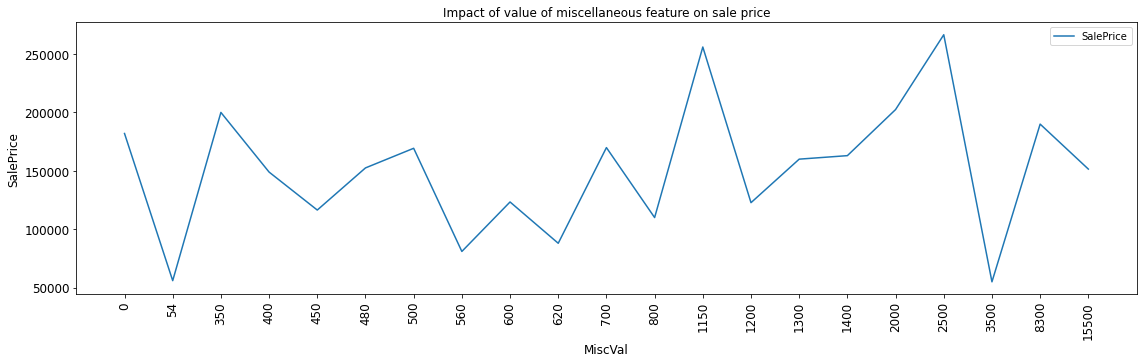

In [649]:
train_misc_val = train_data.groupby('MiscVal', as_index = False)['SalePrice'].mean().sort_values(by = 'MiscVal')
ax = train_misc_val[['SalePrice']].plot(kind = 'line',
                                                   title = 'Impact of value of miscellaneous feature on sale price',
                                                   figsize = (19,5),
                                                   legend = True,
                                                   fontsize = 12)
ax.set_xlabel('MiscVal', fontsize=12)
ax.set_ylabel('SalePrice', fontsize=12)
ax.set_xticks(range(len(train_misc_val)))
ax.set_xticklabels(train_misc_val['MiscVal'])
plt.xticks(rotation=90)
plt.show()

In [650]:
train_data = train_data.drop(['MoSold', 'YrSold', 'SaleType', 'SaleCondition'], 1)

همبستگی داده های تبدیل شده

In [651]:
corr_matrix = train_data.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False) #Do not drop SalePrice this time!
corr_matrix[corr_matrix['SalePrice'] > 0.5].style.background_gradient(cmap = 'coolwarm').set_precision(2)

,SalePrice
SalePrice,1.00
OverallQual,0.79
Neighborhood,0.74
GrLivArea,0.71
ExterQual,0.69
KitchenQual,0.68
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61


تغییرات مشابه با آزمون
ابتدا بیایید ستون ها را رها کرده و تمام قطعات گم شده را در حین تمرین پر کنیم

In [652]:
test_data = test_data.drop('MSSubClass', 1)
test_data = test_data.drop('Street', 1)
test_data = test_data.drop('Utilities', 1)
test_data = test_data.drop('Condition2', 1)
test_data = test_data.drop(['MoSold', 'YrSold', 'SaleType', 'SaleCondition'], 1)

test_data['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)
test_data['Alley'].fillna(0, inplace = True)
test_data['MasVnrType'].fillna('None', inplace = True)
test_data['MasVnrArea'].fillna(value, inplace = True)
# for col in bsmt_cols:
#     test_data[col].fillna('None', inplace = True)
for col in garage_cols:
    test_data[col].fillna('None', inplace = True)
test_data['Electrical'].fillna('None', inplace = True)
test_data['FireplaceQu'].fillna('None', inplace = True)
test_data['PoolQC'].fillna('None', inplace = True)
test_data['Fence'].fillna('None', inplace = True)
test_data['MiscFeature'].fillna('None', inplace = True)

آیا اطلاعات مفقوده ای باقی مانده است؟

In [653]:
missing_test = pd.concat([test_data.isna().sum().sort_values(ascending = False), test_data.dtypes], axis=1, keys=['Total', 'Type'])
missing_test[missing_test['Total'] > 0]

,Total,Type
BsmtCond,45,object
BsmtExposure,44,object
BsmtQual,44,object
BsmtFinType2,42,object
BsmtFinType1,42,object
MSZoning,4,object
Functional,2,object
BsmtFullBath,2,float64
BsmtHalfBath,2,float64
BsmtFinSF2,1,float64


فقط چند مقدار ، آنها تأثیر کمی بر نتایج دارند. همه آنها را به محبوب ترین مقادیر در ستون های مربوطه تغییر دهید.

In [654]:
test_data['MSZoning'].fillna('RL', inplace = True)
test_data['BsmtFullBath'].fillna('0.0', inplace = True)
test_data['Functional'].fillna('Typ', inplace = True)
test_data['BsmtHalfBath'].fillna('0.0', inplace = True)
test_data['KitchenQual'].fillna('TA', inplace = True)
test_data['Exterior1st'].fillna('VinylSd', inplace = True)
test_data['Exterior2nd'].fillna('VinylSd', inplace = True)

In [655]:
test_data['MSZoning'] = test_data['MSZoning'].apply(lambda x: msz.loc[msz['MSZoning'] == x, 'normalized'].item())
test_data['MSZoning'] = test_data['MSZoning'].astype(float)
test_data['Alley'] = test_data['Alley'].replace('Grvl', '1', regex = True)
test_data['Alley'] = test_data['Alley'].replace('Pave', '1', regex = True)
test_data['Alley'] = test_data['Alley'].astype(int)
test_data['LotShape'] = test_data['LotShape'].apply(lambda x: lshp.loc[lshp['LotShape'] == x, 'normalized'].item())
test_data['LotShape'] = test_data['LotShape'].astype(float)
test_data['LandContour'] = test_data['LandContour'].apply(lambda x: lctr.loc[lctr['LandContour'] == x, 'normalized'].item())
test_data['LandContour'] = test_data['LandContour'].astype(float)
test_data['LotConfig'] = test_data['LotConfig'].apply(lambda x: lcfg.loc[lcfg['LotConfig'] == x, 'normalized'].item())
test_data['LotConfig'] = test_data['LotConfig'].astype(float)
test_data['LandSlope'] = test_data['LandSlope'].apply(lambda x: lslp.loc[lslp['LandSlope'] == x, 'normalized'].item())
test_data['LandSlope'] = test_data['LandSlope'].astype(float)
test_data['Neighborhood'] = test_data['Neighborhood'].apply(lambda x: ngbh.loc[ngbh['Neighborhood'] == x, 'normalized'].item())
test_data['Neighborhood'] = test_data['Neighborhood'].astype(float)
test_data['Condition1'] = test_data['Condition1'].apply(lambda x: cond1.loc[cond1['Condition1'] == x, 'normalized'].item())
test_data['Condition1'] = test_data['Condition1'].astype(float)
test_data['BldgType'] = test_data['BldgType'].apply(lambda x: bldg.loc[bldg['BldgType'] == x, 'normalized'].item())
test_data['BldgType'] = test_data['BldgType'].astype(float)
test_data['HouseStyle'] = test_data['HouseStyle'].apply(lambda x: hstl.loc[hstl['HouseStyle'] == x, 'normalized'].item())
test_data['HouseStyle'] = test_data['HouseStyle'].astype(float)
test_data['RoofStyle'] = test_data['RoofStyle'].apply(lambda x: rfst.loc[rfst['RoofStyle'] == x, 'normalized'].item())
test_data['RoofStyle'] = test_data['RoofStyle'].astype(float)
test_data['RoofMatl'] = test_data['RoofMatl'].apply(lambda x: rfmt.loc[rfmt['RoofMatl'] == x, 'normalized'].item())
test_data['RoofMatl'] = test_data['RoofMatl'].astype(float)
test_data['Exterior1st'] = test_data['Exterior1st'].apply(lambda x: ext1.loc[ext1['Exterior1st'] == x, 'normalized'].item())
test_data['Exterior1st'] = test_data['Exterior1st'].astype(float)
test_data['Exterior2nd'] = test_data['Exterior2nd'].apply(lambda x: ext2.loc[ext2['Exterior2nd'] == x, 'normalized'].item())
test_data['Exterior2nd'] = test_data['Exterior2nd'].astype(float)
test_data['MasVnrType'] = test_data['MasVnrType'].apply(lambda x: mvtp.loc[mvtp['MasVnrType'] == x, 'normalized'].item())
test_data['MasVnrType'] = test_data['MasVnrType'].astype(float)
test_data['ExterQual'] = test_data['ExterQual'].apply(lambda x: exql.loc[exql['ExterQual'] == x, 'normalized'].item())
test_data['ExterQual'] = test_data['ExterQual'].astype(float)
test_data['ExterCond'] = test_data['ExterCond'].apply(lambda x: excn.loc[excn['ExterCond'] == x, 'normalized'].item())
test_data['ExterCond'] = test_data['ExterCond'].astype(float)
test_data['Foundation'] = test_data['Foundation'].apply(lambda x: fndt.loc[fndt['Foundation'] == x, 'normalized'].item())
test_data['Foundation'] = test_data['Foundation'].astype(float)
test_data['Heating'] = test_data['Heating'].apply(lambda x: heat.loc[heat['Heating'] == x, 'normalized'].item())
test_data['Heating'] = test_data['Heating'].astype(float)
test_data['HeatingQC'] = test_data['HeatingQC'].apply(lambda x: htqc.loc[htqc['HeatingQC'] == x, 'normalized'].item())
test_data['HeatingQC'] = test_data['HeatingQC'].astype(float)
test_data['CentralAir'] = test_data['CentralAir'].replace('Y', '1', regex = True)
test_data['CentralAir'] = test_data['CentralAir'].replace('N', '0', regex = True)
test_data['CentralAir'] = test_data['CentralAir'].astype(int)
test_data['Electrical'] = test_data['Electrical'].apply(lambda x: elec.loc[elec['Electrical'] == x, 'normalized'].item())
test_data['Electrical'] = test_data['Electrical'].astype(float)
test_data['KitchenQual'] = test_data['KitchenQual'].apply(lambda x: kchq.loc[kchq['KitchenQual'] == x, 'normalized'].item())
test_data['KitchenQual'] = test_data['KitchenQual'].astype(float)
test_data['Functional'] = test_data['Functional'].apply(lambda x: func.loc[func['Functional'] == x, 'normalized'].item())
test_data['Functional'] = test_data['Functional'].astype(float)
test_data['FireplaceQu'] = test_data['FireplaceQu'].apply(lambda x: frpq.loc[frpq['FireplaceQu'] == x, 'normalized'].item())
test_data['FireplaceQu'] = test_data['FireplaceQu'].astype(float)
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].replace('None', 0, regex = True)
test_data['GarageCars'] = test_data['GarageCars'].replace('None', 0, regex = True)
test_data['GarageArea'] = test_data['GarageArea'].replace('None', 0, regex = True)
test_data['GarageType'] = test_data['GarageType'].apply(lambda x: grtp.loc[grtp['GarageType'] == x, 'normalized'].item())
test_data['GarageType'] = test_data['GarageType'].astype(float)
test_data['GarageFinish'] = test_data['GarageFinish'].apply(lambda x: grfn.loc[grfn['GarageFinish'] == x, 'normalized'].item())
test_data['GarageFinish'] = test_data['GarageFinish'].astype(float)
test_data['GarageQual'] = test_data['GarageQual'].apply(lambda x: grqu.loc[grqu['GarageQual'] == x, 'normalized'].item())
test_data['GarageQual'] = test_data['GarageQual'].astype(float)
test_data['GarageCond'] = test_data['GarageCond'].apply(lambda x: grcn.loc[grcn['GarageCond'] == x, 'normalized'].item())
test_data['GarageCond'] = test_data['GarageCond'].astype(float)
test_data['PavedDrive'] = test_data['PavedDrive'].apply(lambda x: pvdr.loc[pvdr['PavedDrive'] == x, 'normalized'].item())
test_data['PavedDrive'] = test_data['PavedDrive'].astype(float)
test_data['Fence'] = test_data['Fence'].apply(lambda x: fenc.loc[fenc['Fence'] == x, 'normalized'].item())
test_data['Fence'] = test_data['Fence'].astype(float)
test_data['MiscFeature'] = test_data['MiscFeature'].apply(lambda x: misc.loc[misc['MiscFeature'] == x, 'normalized'].item())
test_data['MiscFeature'] = test_data['MiscFeature'].astype(float)

test_data = test_data.replace('None', 0, regex = True)

در اینجا نقاط دور حذف می شوند

In [656]:
train_data

,Id,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,SalePrice
0,1,0.835,65.0,8450,Pave,0,0.000,0.419,0.000,0.0,0.420,0.544,1.0,0.909,7,5,2003,2003,0.297,0.169,0.747,0.511,0.489,196.0,0.514,0.861,1.000,Gd,TA,No,GLQ,706,Unf,0,150,856,1.0,1.000,1,1.000,856,854,0,1710,1,0,2,1,3,1,0.478,8,1.000,0,0.056,0.658,2003.0,0.722,2,548,0.62,1.0,1.0,0,61,0,0,0,0,1.000,0.564,0,208500
1,2,0.835,80.0,9600,Pave,0,0.000,0.419,0.021,0.0,0.592,0.081,1.0,0.599,6,8,1976,1976,0.297,0.169,0.411,0.209,0.083,0.0,0.202,0.861,0.360,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1.0,1.000,1,1.000,1262,0,0,1262,0,1,2,0,3,1,0.154,6,1.000,1,0.365,0.658,1976.0,0.722,2,460,0.62,1.0,1.0,298,0,0,0,0,0,1.000,0.564,0,181500
2,3,0.835,68.0,11250,Pave,0,0.551,0.419,0.000,0.0,0.420,0.544,1.0,0.909,7,5,2001,2002,0.297,0.169,0.747,0.511,0.489,162.0,0.514,0.861,1.000,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1.0,1.000,1,1.000,920,866,0,1786,1,0,2,1,3,1,0.478,6,1.000,1,0.365,0.658,2001.0,0.722,2,608,0.62,1.0,1.0,0,42,0,0,0,0,1.000,0.564,0,223500
3,4,0.835,60.0,9550,Pave,0,0.551,0.419,0.100,0.0,0.473,0.544,1.0,0.909,7,5,1915,1970,0.297,0.169,0.413,0.263,0.083,0.0,0.202,0.861,0.211,TA,Gd,No,ALQ,216,Unf,0,540,756,1.0,0.546,1,1.000,961,756,0,1717,1,0,1,0,3,1,0.478,7,1.000,1,0.464,0.203,1998.0,0.284,3,642,0.62,1.0,1.0,0,35,272,0,0,0,1.000,0.564,0,140000
4,5,0.835,84.0,14260,Pave,0,0.551,0.419,0.021,0.0,1.000,0.544,1.0,0.909,8,5,2000,2000,0.297,0.169,0.747,0.511,0.489,350.0,0.514,0.861,1.000,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1.0,1.000,1,1.000,1145,1053,0,2198,1,0,2,1,4,1,0.478,9,1.000,1,0.365,0.658,2000.0,0.722,3,836,0.62,1.0,1.0,192,84,0,0,0,0,1.000,0.564,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.835,62.0,7917,Pave,0,0.000,0.419,0.000,0.0,0.398,0.544,1.0,0.909,6,5,1999,2000,0.297,0.169,0.747,0.511,0.083,0.0,0.202,0.861,1.000,Gd,TA,No,Unf,0,Unf,0,953,953,1.0,1.000,1,1.000,953,694,0,1647,0,0,2,1,3,1,0.154,7,1.000,1,0.365,0.658,1999.0,0.722,2,460,0.62,1.0,1.0,0,40,0,0,0,0,1.000,0.564,0,175000
1456,1457,0.835,85.0,13175,Pave,0,0.000,0.419,0.000,0.0,0.382,0.544,1.0,0.599,6,6,1978,1988,0.297,0.169,0.549,0.295,1.000,119.0,0.202,0.861,0.360,Gd,TA,No,ALQ,790,Rec,163,589,1542,1.0,0.433,1,1.000,2073,0,0,2073,1,0,2,0,3,1,0.154,7,0.621,2,0.365,0.658,1978.0,0.284,2,500,0.62,1.0,1.0,349,0,0,0,0,0,0.271,0.564,0,210000
1457,1458,0.835,66.0,9042,Pave,0,0.000,0.419,0.000,0.0,0.473,0.544,1.0,0.909,7,9,1941,2006,0.297,0.169,0.841,0.585,0.083,0.0,1.000,0.740,0.497,TA,Gd,No,GLQ,275,Unf,0,877,1152,1.0,1.000,1,1.000,1188,1152,0,2340,0,0,2,0,4,1,0.478,9,1.000,2,0.464,0.658,1941.0,0.722,1,252,0.62,1.0,1.0,0,60,0,0,0,0,0.837,0.367,2500,266500
1458,1459,0.835,68.0,9717,Pave,0,0.000,0.419,0.000,0.0,0.200,0.544,1.0,0.599,5,6,1950,1996,0.920,0.169,0.411,0.209,0.083,0.0,0.202,0.861,0.360,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,1.0,0.546,1,0.461,1078,0,0,1078,1,0,1,0,2,1,0.478,5,1.000,0,0.056,0.658,1950.0,0.284,1,240,0.62,1.0,1.0,366,0,112,0,0,0,1.000,0.564,0,142125


In [657]:
train_data =train_data.drop('GrLivArea',1)
test_data = test_data.drop('BsmtQual',1)
test_data = test_data.drop('BsmtCond',1)
test_data = test_data.drop('BsmtExposure',1)
test_data = test_data.drop('BsmtFinType1',1)
test_data = test_data.drop('BsmtFinType2',1)
test_data = test_data.drop('PoolQC',1)

تقسیم داده ها برای مدل های مختلف

In [658]:
list_to_remove = corr_matrix[corr_matrix['SalePrice'] < 0.5].index.values.tolist()
list_to_remove.remove('Id')

In [659]:
train_data =train_data.drop('Street',1)
train_data = train_data.drop('BsmtQual',1)

In [660]:
train_short = train_data.drop(list_to_remove, 1)
test_short = test_data.drop(list_to_remove, 1)

In [666]:
X_train = train_data.drop(columns = ['SalePrice'])
Y_train = train_data['SalePrice']
X_test = test_data
X_train_short = train_short.drop(columns = ['SalePrice'])
Y_train_short = train_short['SalePrice']
X_test = test_short
X_test = X_test.drop('Id',1)
X_train_short

,Id,Neighborhood,OverallQual,YearBuilt,YearRemodAdd,ExterQual,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,TotalBsmtSF,1stFlrSF,FullBath,KitchenQual,TotRmsAbvGrd,FireplaceQu,GarageFinish,GarageCars,GarageArea
0,1,0.420,7,2003,2003,0.514,1.000,TA,No,GLQ,Unf,856,856,2,0.478,8,0.056,0.722,2,548
1,2,0.592,6,1976,1976,0.202,0.360,TA,Gd,ALQ,Unf,1262,1262,2,0.154,6,0.365,0.722,2,460
2,3,0.420,7,2001,2002,0.514,1.000,TA,Mn,GLQ,Unf,920,920,2,0.478,6,0.365,0.722,2,608
3,4,0.473,7,1915,1970,0.202,0.211,Gd,No,ALQ,Unf,756,961,1,0.478,7,0.464,0.284,3,642
4,5,1.000,8,2000,2000,0.514,1.000,TA,Av,GLQ,Unf,1145,1145,2,0.478,9,0.365,0.722,3,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,0.398,6,1999,2000,0.202,1.000,TA,No,Unf,Unf,953,953,2,0.154,7,0.365,0.722,2,460
1456,1457,0.382,6,1978,1988,0.202,0.360,TA,No,ALQ,Rec,1542,2073,2,0.154,7,0.365,0.284,2,500
1457,1458,0.473,7,1941,2006,1.000,0.497,Gd,No,GLQ,Unf,1152,1188,2,0.478,9,0.464,0.722,1,252
1458,1459,0.200,5,1950,1996,0.202,0.360,TA,Mn,GLQ,Rec,1078,1078,1,0.478,5,0.056,0.284,1,240


In [667]:
 X_train_short =X_train_short.drop('BsmtCond',1)
X_train_short =X_train_short.drop('BsmtExposure',1)
X_train_short =X_train_short.drop('BsmtFinType1',1)
X_train_short =X_train_short.drop('BsmtFinType2',1)
X_train_short = X_train_short.drop('Id',1)

In [668]:
X_train_short = np.array(X_train_short)
Y_train_short =np.array(Y_train_short)
X_test_short = np.array(X_test)
X_train_short = X_train_short.astype('float32')
Y_train_short = Y_train_short.astype('float32')
X_train_short = X_train_short.astype('float32')

In [669]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import losses,models,layers,optimizers
from  tensorflow.keras.optimizers import  SGD,Adam

In [675]:
model = models.Sequential([
                      layers.Dense(30,input_dim = 15, activation='relu'),
                      layers.Dense(20, activation='relu'),
                      layers.Dense(100, activation='relu'),
                      layers.Dense(10, activation='relu'),
                      layers.Dense(1, activation='softmax')
])

In [672]:
mean = X_train_short.mean(axis=0)
X_train_short-=mean
std = X_train_short.std(axis=0)
X_train_short/=std
mean = Y_train_short.mean(axis=0)
Y_train_short-=mean
std = Y_train_short.std(axis=0)
Y_train_short/=std
mean = X_test.mean(axis=0)
X_test-=mean
std = X_test.std(axis=0)
X_test/=std


In [679]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.00001),
loss=losses.mean_squared_logarithmic_error)

In [680]:
output=model.fit(X_train_short, Y_train_short,epochs=300)

Epoch 1/300
46/46 [==============================] - 1s 2ms/step - loss: 0.3662
Epoch 2/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 3/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 4/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 5/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 6/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 7/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 8/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 9/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 10/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 11/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 12/300
46/46 [==============================] - 0s 2ms/step - loss: 0.3662
Epoch 13/300
46/46 [=================

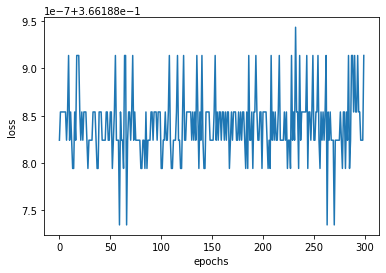

In [681]:
plt.plot(output.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

In [ ]:
# # A = []
# prob =output.history.predict(X_test[1])

In [682]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_short, Y_train_short)
print(lm.score(X_train_short, Y_train_short))

0.8038976624335109
